# Librerias

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models.dbscan import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score, mutual_info_score


# Cargando data

In [156]:
csv_path = './procesed-data/reduced/pca/r21d-cleaned.csv'
data_r21d = pd.read_csv(csv_path, header=None)
data_r21d = data_r21d.to_numpy()

csv_path = './procesed-data-validation/reduced/pca/r21d-cleaned.csv'
data_r21d_validation = pd.read_csv(csv_path, header=None)
data_r21d_validation = data_r21d_validation.to_numpy()

csv_path = './procesed-data/reduced/pca/s3d-cleaned.csv'
data_s3d = pd.read_csv(csv_path, header=None)
data_s3d = data_s3d.to_numpy()

csv_path = './procesed-data-validation/reduced/pca/s3d-cleaned.csv'
data_s3d_validation = pd.read_csv(csv_path, header=None)
data_s3d_validation = data_s3d_validation.to_numpy()

csv_path = './data/val_subset_10.csv'
val_subset_10 = pd.read_csv(csv_path, header=0)

# DBSCAN & r21d

In [157]:
csv_path = './procesed-data-validation/full/r21d.csv'
labels = pd.read_csv(csv_path, header=0)
labels = labels['Filename']
labels = labels.str.split('_').str[0]

In [158]:
filtered_df = pd.DataFrame(columns=val_subset_10.columns)

for label in labels:
    row = val_subset_10[val_subset_10['youtube_id'] == label]
    filtered_df = pd.concat([filtered_df, row], ignore_index=True)

In [159]:
encoder = LabelEncoder()
filtered_df['label_encoded'] = encoder.fit_transform(filtered_df['label'])
real_labels = filtered_df['label_encoded']
real_labels_array = real_labels.to_numpy()

In [160]:

# Concatenar los conjuntos de datos de entrenamiento y validación
combined_data = np.concatenate((data_r21d, data_r21d_validation))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
combined_data_standardized = scaler.fit_transform(combined_data)


# Crear una instancia de DBSCAN
# Asumiendo que la clase DBSCAN ya está definida y correctamente importada
dbscan = DBSCAN(radio=45, vecinos_min=1)

# Ajustar DBSCAN al conjunto combinado
labels = dbscan.fit(combined_data_standardized)

# Extraer las etiquetas para el conjunto de validación
# El número de etiquetas a extraer es igual al número de ejemplos en validation_data
validation_labels = labels[-len(data_r21d_validation):]

# Imprimir las etiquetas extraídas para el conjunto de validación
print("Etiquetas para el conjunto de validación:", validation_labels)
score = adjusted_rand_score(real_labels_array, validation_labels)
print("Adjusted Rand Score:", score)

Etiquetas para el conjunto de validación: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [161]:
score_ars = adjusted_rand_score(real_labels_array, validation_labels)


score_mi = mutual_info_score(real_labels_array, validation_labels)

results = pd.DataFrame({
    'Metric': ['Adjusted Rand Score', 'Mutual Information'],
    'Score': [score_ars, score_mi]
})

print(results.to_string(index=False))

             Metric  Score
Adjusted Rand Score    0.0
 Mutual Information    0.0


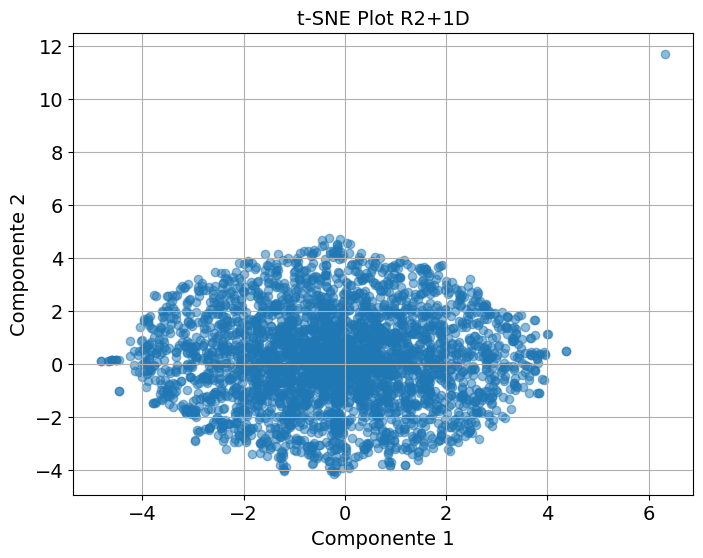

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Suponiendo que 'combined_data_standardized' ya está definido y estandarizado
# Aplicar t-SNE a los datos
tsne = TSNE(n_components=2, random_state=42)  # Utiliza 2 componentes para visualización 2D
tsne_results = tsne.fit_transform(combined_data_standardized)

# Graficar los resultados de t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title('t-SNE Plot R2+1D', fontsize=14)
plt.xlabel('Componente 1',  fontsize=14)
plt.ylabel('Componente 2',fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=14)  
plt.show()


# DBSCAN & s3d

In [163]:
csv_path = './procesed-data-validation/full/s3d.csv'
labels = pd.read_csv(csv_path, header=0)
labels = labels['Filename']
labels = labels.str.split('_').str[0]

In [164]:
filtered_df = pd.DataFrame(columns=val_subset_10.columns)

for label in labels:
    row = val_subset_10[val_subset_10['youtube_id'] == label]
    filtered_df = pd.concat([filtered_df, row], ignore_index=True)

In [165]:
encoder = LabelEncoder()
filtered_df['label_encoded'] = encoder.fit_transform(filtered_df['label'])
real_labels = filtered_df['label_encoded']
real_labels_array = real_labels.to_numpy()

In [166]:

# Concatenar los conjuntos de datos de entrenamiento y validación
combined_data = np.concatenate((data_s3d, data_s3d_validation))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
combined_data_standardized = scaler.fit_transform(combined_data)


# Crear una instancia de DBSCAN
# Asumiendo que la clase DBSCAN ya está definida y correctamente importada
dbscan = DBSCAN(radio=45, vecinos_min=1)

# Ajustar DBSCAN al conjunto combinado
labels = dbscan.fit(combined_data_standardized)

# Extraer las etiquetas para el conjunto de validación
# El número de etiquetas a extraer es igual al número de ejemplos en validation_data
validation_labels = labels[-len(data_r21d_validation):]

# Imprimir las etiquetas extraídas para el conjunto de validación
print("Etiquetas para el conjunto de validación:", validation_labels)
score = adjusted_rand_score(real_labels_array, validation_labels)
print("Adjusted Rand Score:", score)

Etiquetas para el conjunto de validación: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 99, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 100, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 101, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 102, 1, 1, 103, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 104, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 105, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 106, 1, 1, 1, 1, 1, 1, 1, 

In [167]:
score_ars = adjusted_rand_score(real_labels_array, validation_labels)


score_mi = mutual_info_score(real_labels_array, validation_labels)

results = pd.DataFrame({
    'Metric': ['Adjusted Rand Score', 'Mutual Information'],
    'Score': [score_ars, score_mi]
})

print(results.to_string(index=False))

             Metric    Score
Adjusted Rand Score 0.000097
 Mutual Information 0.065356


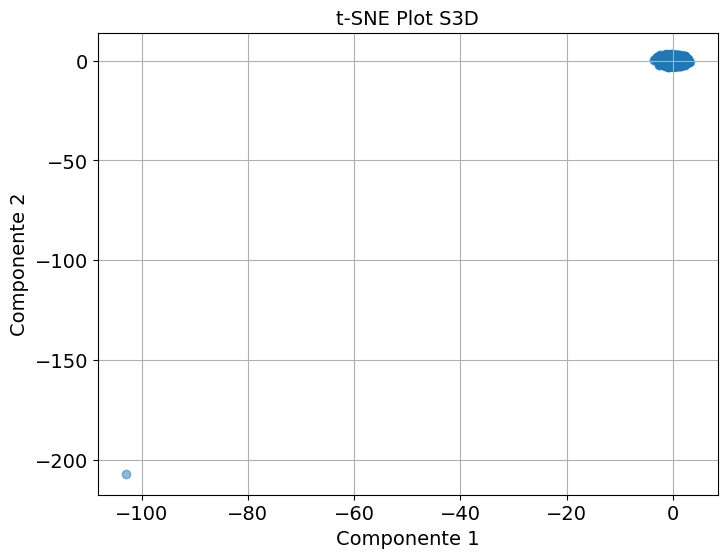

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Suponiendo que 'combined_data_standardized' ya está definido y estandarizado
# Aplicar t-SNE a los datos
tsne = TSNE(n_components=2, random_state=42)  # Utiliza 2 componentes para visualización 2D
tsne_results = tsne.fit_transform(combined_data_standardized)

# Graficar los resultados de t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title('t-SNE Plot S3D', fontsize=14)
plt.xlabel('Componente 1',  fontsize=14)
plt.ylabel('Componente 2',fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=14)  
plt.show()